In [1]:
#pip install summarytools

In [2]:
import os
import pandas as pd
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt
os.listdir("../data/raw")

['winequalityN.csv']

In [4]:
os.getcwd()

'C:\\Users\\S P E C T R E\\Desktop\\Personal Projects\\wine_quality_project\\notebooks'

In [15]:
#loading the data
wine_pro = pd.read_csv("../data/raw/winequalityN.csv", sep=';')
wine_pro.head()
wine_pro.info()
wine_pro.describe()
wine_pro.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#EDA
dfSummary(wine_pro, is_collapsible=False)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,fixed acidity[float64],Mean (sd) : 8.3 (1.7)min < med < max:4.6 < 7.9 < 15.9IQR (CV) : 2.1 (4.8),96 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAoFJREFUeJzt3U+L2kAYgPEZky2piiIWvXnZY6EHj36Ifth+hAp+Aq978iaEoJhNSIwpWdie+mczmei8w/O7z5qFh+Awvoyu61oBrhs8+gGAjwiVw7TWn5VSnwyXF3VdZ5YfCQ8SuhzpfD7/PplMZibrz+dzorX+Qax+cDbU5k3aRLrZbLLpdJq3WXg6naLdbjeL47h5GxOqB1wO9U0T6WKxeDVY2nxtgCfYTEEEQoUIhAoRCBUiECpEIFSIQKgQgVAhAqFCBEKFCIQKEQgVIhAqRCBUiECoEIFQIQKhQgTnf+FvqqqqJ6XURGtt+icYDnSIl6GmafpUluW31WoVBEHQat7qHcOBbvEy1KIowiiKhuv1Ol8ul0nb9QwHusfLUN+NRiPTwcAGw4EOYTMFEQgVIhAqRCBUiECoEIFQIQKhQgRChQiEChEIFSIQKkQgVIhAqBCBUCFC6PD1O5Pb7db8Sh/oL9Su1++UZRlVVfU1z/OfSinT35TCE6GL1+80DofDbL/fD6/Xa9DP40GS0NXrd5Ik4Rf2+I3NFETwembqgePWjFpbRqg9jFszam0foVoet2bUuh+E2s+4NRtBy9hMQQRChQiEChEIFSIQKkRg198DDgvsI1TLOCzoB6FaxmFBPwi1JxwW2MVmCiLwRnUMl2T8GaE6hEsy/o5QHcIlGR1C7TBJyhSpIS7JaBlql0lSpkhxzzeq8SQpU6S4+3dUk0lSpkgfo/L0+JbNlEdSj49vCdUjRcfj2+12u4jj+IvW+tzhAOlmuPafb/Pwo/9E20+9XC5va9I0jY7H4/Ce66V+tq3nVgayLOv0Nm6+cqRp+jwej18Gg0HZdv3/3ua/ALiTgEsaf/c5AAAAAElFTkSuQmCC"">",0(0.0%)
2,volatile acidity[float64],Mean (sd) : 0.5 (0.2)min < med < max:0.1 < 0.5 < 1.6IQR (CV) : 0.2 (2.9),143 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmtJREFUeJzt3U9u2kAYh+Fx7RQXkBFCgh0XiNQFSx+ih+0RWHACbsAOCSEQThyM7cqRkLpIK/wP/BveZz+AklfOMLbyOXmeG6Drvj36AwC38IylHMf5YYz5XuMlznmevzf4kVCDZ2ukk8nkVxAE46qvcTwe947j/CbWbrAy1OJKWkQahuH7aDSKyy4+HA7+arUa73a74opMqB1ga6ifikin0+lbxeXF1gEdwZcpSCBUSCBUSCBUSPAsPQsNsix7aeEj4UE8G89CkyTx0zR9jeN4aYyp+q0fzxJqzbtDwXA4nIZheCx7FrrZbMbr9bp/uVzciu+NZwm17t2h61Wx1+sty56F7vd7zkAt43X17hBXRdx1j1r17hBXRfyN4ylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRI6OywiUdL07SYqhI4jlNlOZOpG0aoX4ii6CVJkp/z+dx1Xbf0v3VnMnXzCPUL5/PZ832/v1gs4tlsti+zlsnU7SDU/xgMBlWnUzN/oGF8mYIEQoUEQoUEQoUEQoUEQoUEQoUd56g1RpkHWZYVtyGBdkOtM8r8OsY8juOlMabKoTlw8xW18ihzxpjj7rdQq4wyf+Yx5jx51Tzu9TeMJ6/aQagN48mrdhBqS3jyqlmEatf+1to9LqFatL+1eY9LqJbsb23f43q3/gDKvvDpdPpcE0WRv91u+/dcr/re17V1pGla/E7rbB0e5SPP83/+FfkDt50nCeVaj94AAAAASUVORK5CYII="">",0(0.0%)
3,citric acid[float64],Mean (sd) : 0.3 (0.2)min < med < max:0.0 < 0.3 < 1.0IQR (CV) : 0.3 (1.4),80 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAlxJREFUeJzt3L1y2kAYRuHdCBwZMvwMCXS0FJ5xQclF5GJzCSloabgDOmaEBgZZGCGUkWucIAmC3p3z1F6W4hh7pU/YLMsMUHdfHv0GgGs0/vUD1tpnY8yTKeeYZVlcci1wXah5pIPB4Gen0+mbEna7XWit/UWsuPcn6lMe6Ww2i7vd7qHIC2+3W38+n/eDIMg/jQkV9/3Tn8sjHQ6HbyVeP/+3AaiMwxQkECokECokECokECokECokECokECokECokECokECrcudf/KIwYovahMmIIiVAZMYRKqB8YMUSOwxQkECokECokECokECok1P7U/yjcbKgXQr2Amw31Q6iXcbOhZgj1L7jZUB8cpiCBUCGBUCGBUCGBUCHhrqf+NE2bxpiOtbbM8s75fG4q7g2hUKMoaiZJ8joejz3P8wpdi8wlSeKnafpyOBx+G2PeVPaGWKjH47Hh+35rOp0eRqNRWHT9arXqL5fL1ul08pT2hugF/3a7XeqieRiGz8p747Y4TEECoUICoUICoUICoUICoUICoUICoUICE/53UHHOgAcDLyDUG6s6Z8CDgZcR6o1VmTPgwcDPEeqdlJ0z4MHAyzhMQQKhQgKhQgKhQgKhQgKhQgKhQgKhQgIX/N2aE3B2VoBQHZoTcHlWgFBrpOr3EWwdnhUgVLfmBJydFeAwBQmECgmECgmECgkcphyTOvq8FqE6JHL4ea3Gtdfnir7wfr//WBNFkb9er1v/c73q3lXf92az+ZZfh51MJrbX670XWRvH8dfFYvEjCILv1tpd0b1v4D3Lsk9/uf4ARqpjgW3MtscAAAAASUVORK5CYII="">",0(0.0%)
4,residual sugar[float64],Mean (sd) : 2.5 (1.4)min < med < max:0.9 < 2.2 < 15.5IQR (CV) : 0.7 (1.8),91 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAhhJREFUeJzt3TFPwkAchvE7QFMFIQ

# Insights from summary

i. We see there are no missing values so no imputation needed

ii.There are 240 duplicates which is almost 15% of the data

iii.Target is imbalanced, majority of the data is 5 and 6

iv.There are outliers looking at the residual sugar and sulfur dioxide features


In [7]:
#Exploring the data 
numeric_features = [feature for feature in wine_pro.columns if wine_pro[feature].dtype != '0']
categorical_features = [feature for feature in wine_pro.columns if wine_pro[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

We have 0 categorical features : []


#looking at the correlation between the feature 
plt.figure(figsize = (12, 8))
sns.heatmap(wine_pro.corr(), annot = False,  cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

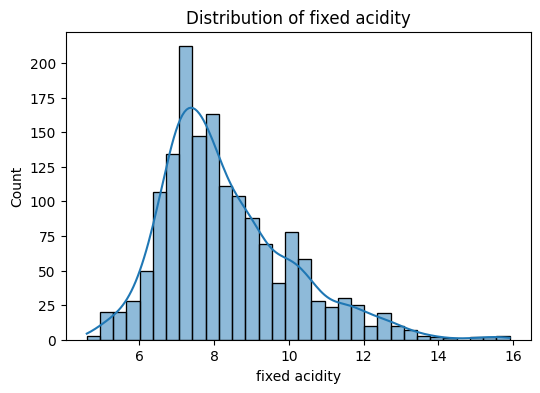

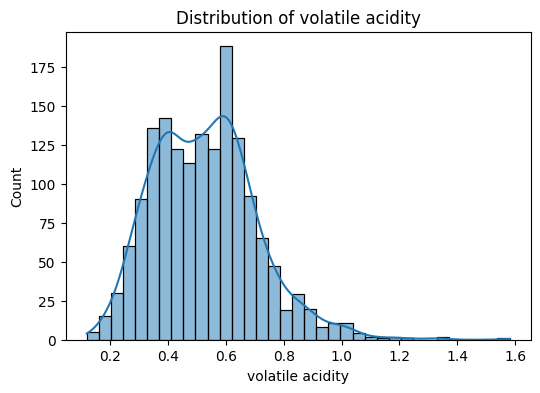

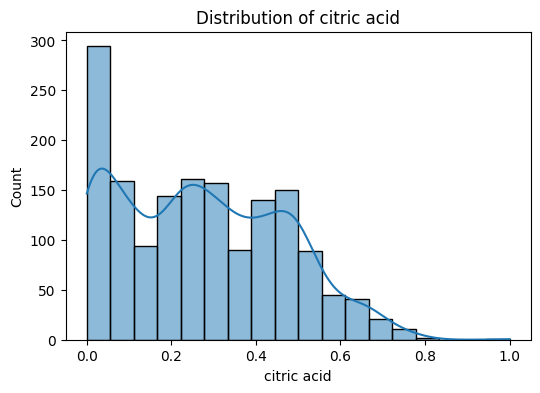

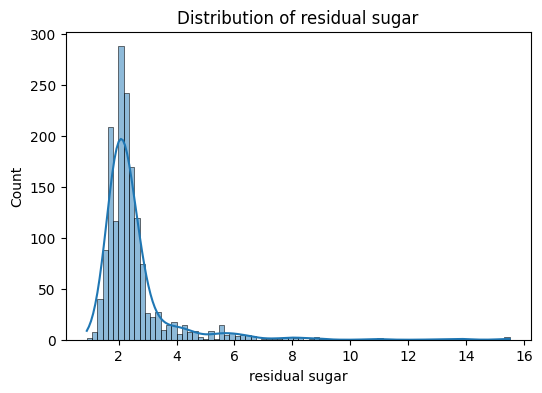

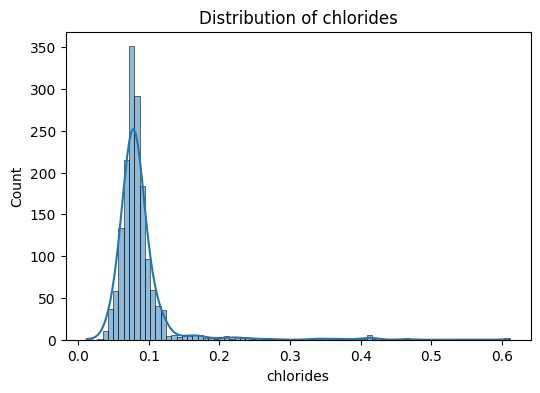

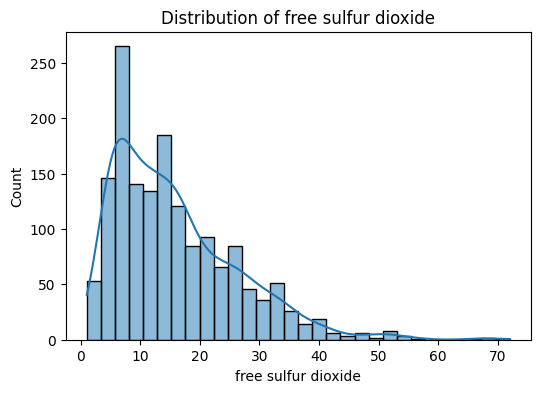

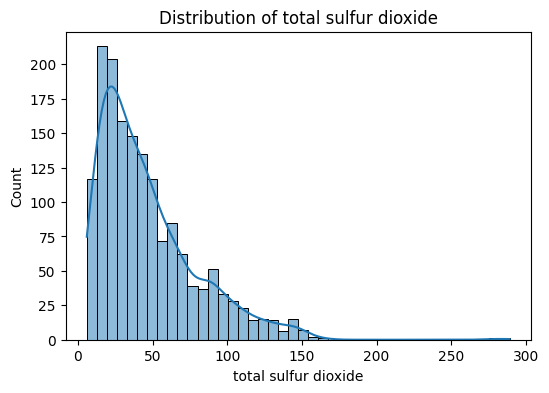

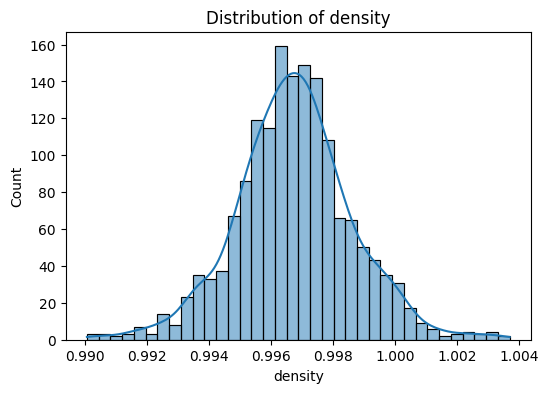

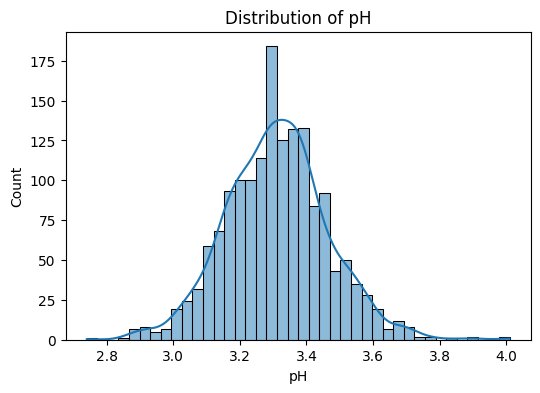

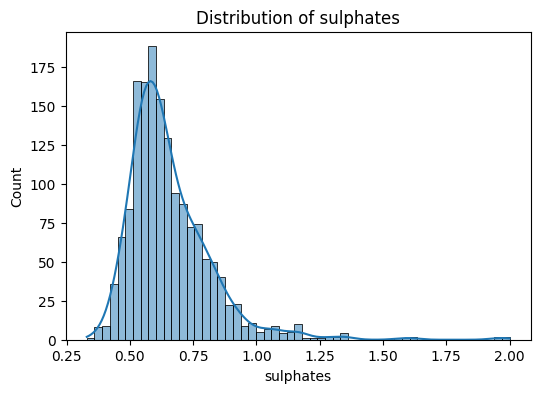

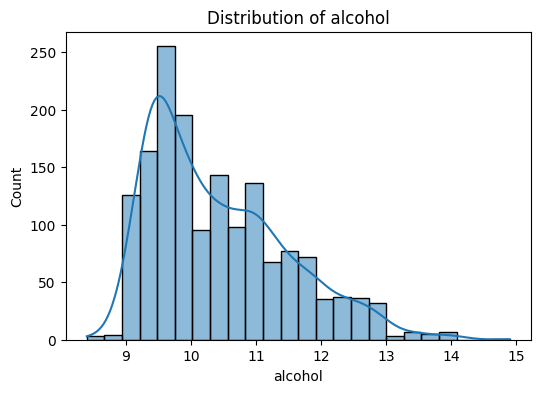

In [20]:
#Univariate Analysis
numeric_cols = wine_pro.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('quality')  # If present

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(wine_pro[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Most of the chemical features in the wine dataset show right-skewed distributions, particularly residual sugar, chlorides, free sulfur dioxide, and total sulfur dioxide. This suggests that while most wines have low values for these attributes, there are a few wines with unusually high levels, which could be considered outliers.

Features like fixed acidity, volatile acidity, citric acid, and sulphates are roughly unimodal, though slightly skewed. The density and pH variables are tightly clustered, indicating low variance.

The alcohol distribution is right-skewed, meaning most wines have moderate alcohol levels, with only few high-alcohol wines.

The quality distribution is multimodal, showing that classes are not uniformly distributed — most wines are rated between 5 and 6, which aligns with the earlier class imbalance issue we identified.

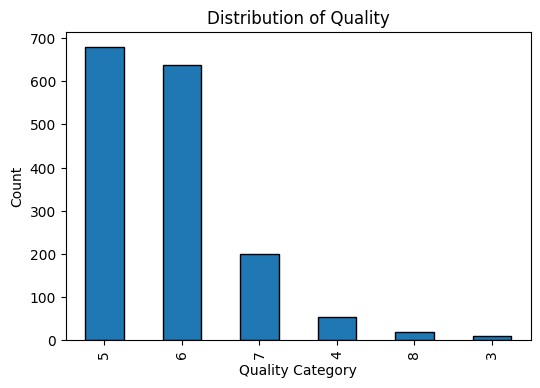

In [17]:
#vizualising the distribution of the target 
plt.figure(figsize=(6,4))
wine_pro['quality'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Quality')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show()

In [18]:
wine_pro['quality'].value_counts(normalize=True) * 100

quality
5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: proportion, dtype: float64

The quality label is unbalanced

In [10]:
#Multi/Bi- Variate Analysis 
#compare = sns.pairplot(wine_pro, hue = "quality", palette = "CMRmap")

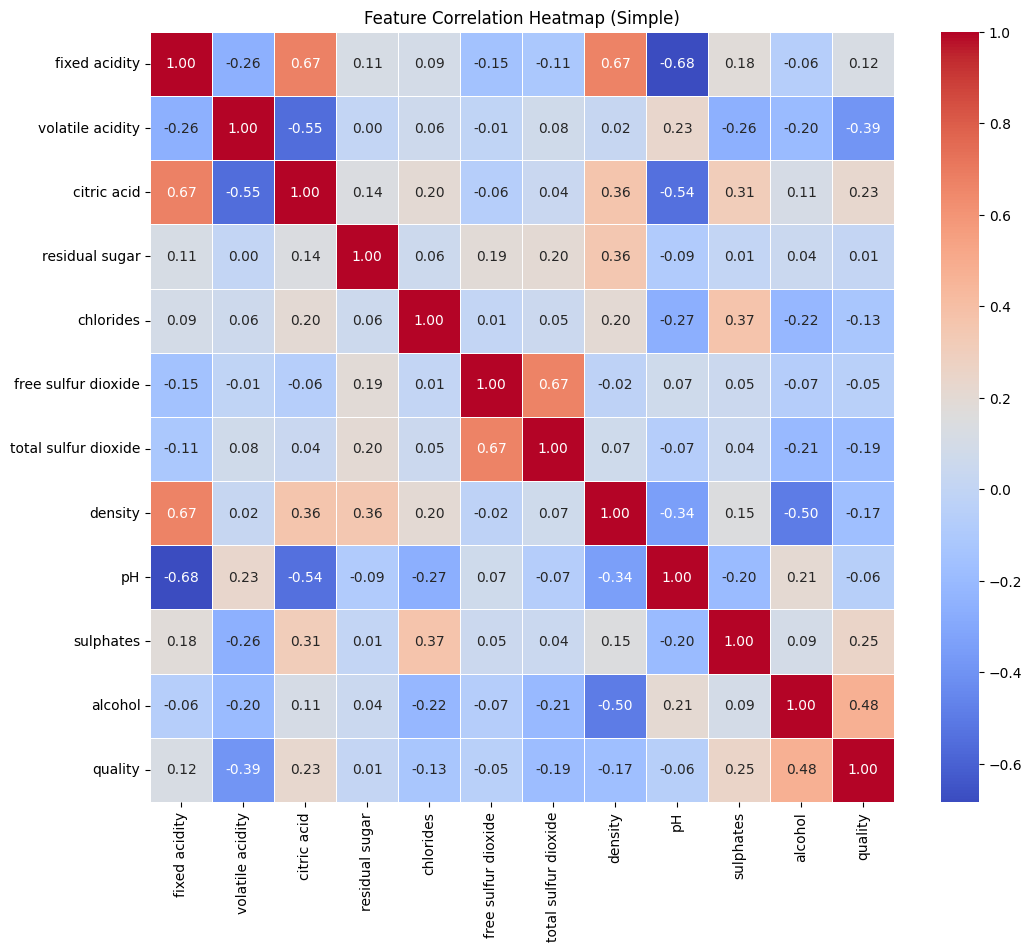

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(wine_pro.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Feature Correlation Heatmap (Simple)')
plt.show()

#### insights from heatmap
i.There is  a strong positive correlation between alcohol and quality, meaning higher alcohol content is consistently linked with better-rated wines.

ii. There is  a strong negative correlation between Volatile Acidity and quality, meaning high volatile acidity (vinegar-like taste) significantly lowers perceived quality.

iii. There is  a Moderate Positive correlation between sulphates Acidity and quality.  Sulphates act as preservatives; moderate levels correlate with higher quality.

iv. There is  a Slight Positive correlation between Citric Acid Acidity and quality. Citric acid slighlty improves acidity balance, contributing mildly to quality

v. Residual Sugar, Free SO2, Total So2, has a weak or no correlation to quality of wine, meaning little influence on the final scores on quality

Features like residual sugar, chlorides, free sulfur dioxide, and total sulfur dioxide have colors that are nearly white/gray when correlated with quality. This indicates they have very little to no direct linear impact on the final quality score compared to alcohol and volatile acidity.


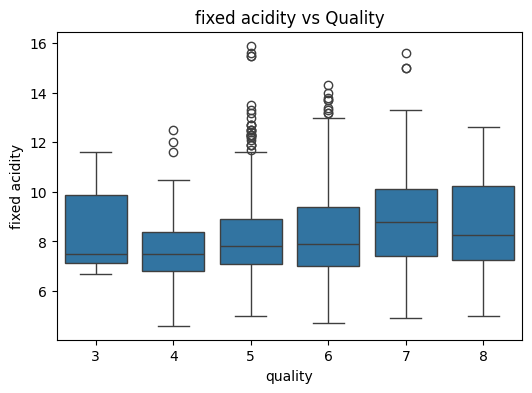

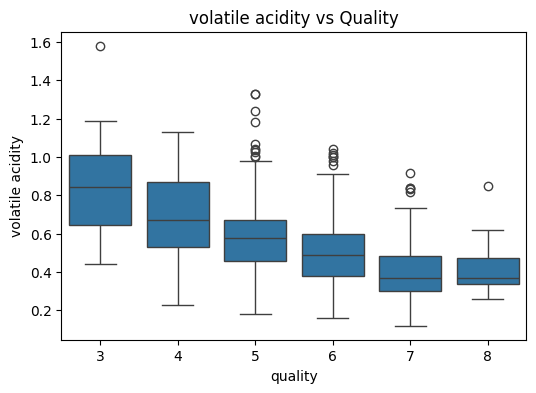

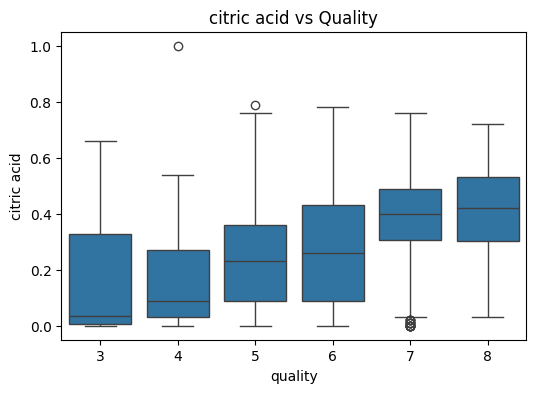

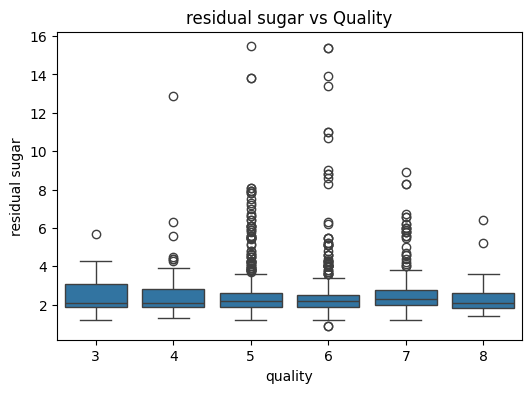

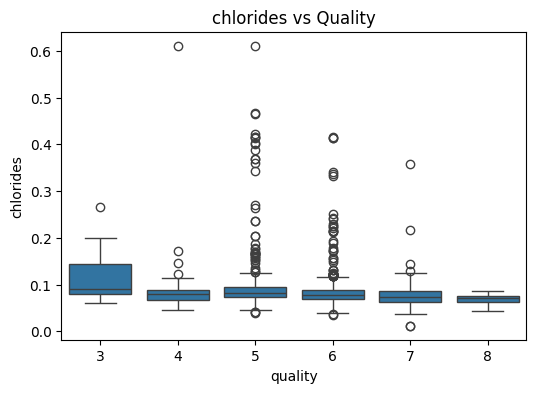

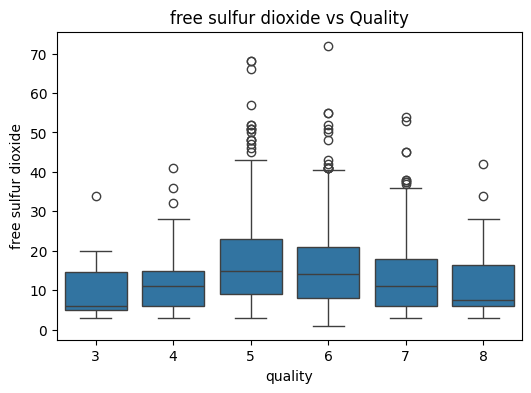

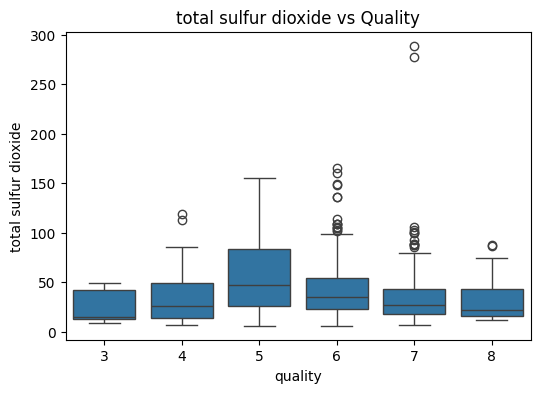

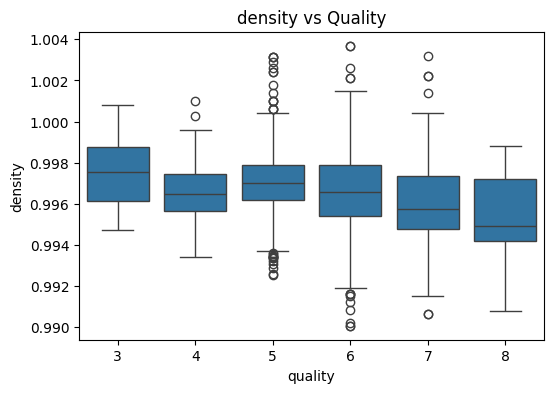

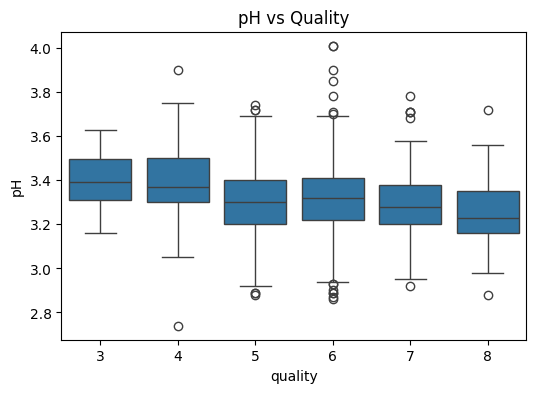

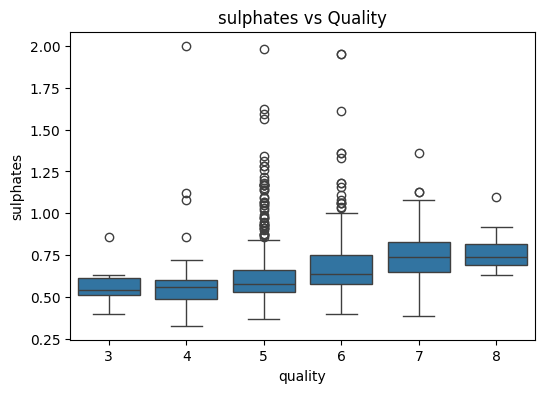

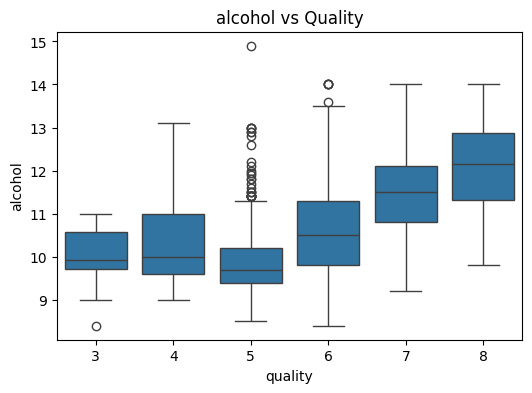

In [21]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='quality', y=col, data=wine_pro)
    plt.title(f'{col} vs Quality')
    plt.show()

In [12]:
wine_pro

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
#checking for outliers 
def detect_outliers_iqr(wine_pro, column):
    Q1 = wine_pro[column].quantile(0.25)
    Q3 = wine_pro[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = wine_pro[(wine_pro[column] < lower_bound) | (wine_pro[column] > upper_bound)]
    return outliers

for col in wine_pro.select_dtypes(include='number').columns:
    outliers = detect_outliers_iqr(wine_pro, col)
    print(f"{col}: {len(outliers)} outliers")

fixed acidity: 49 outliers
volatile acidity: 19 outliers
citric acid: 1 outliers
residual sugar: 155 outliers
chlorides: 112 outliers
free sulfur dioxide: 30 outliers
total sulfur dioxide: 55 outliers
density: 45 outliers
pH: 35 outliers
sulphates: 59 outliers
alcohol: 13 outliers
quality: 28 outliers


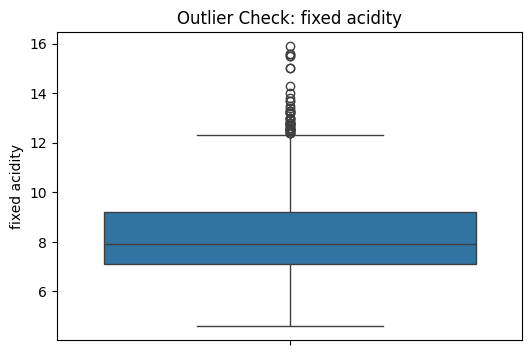

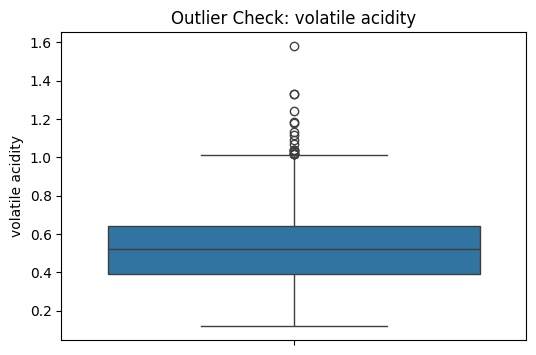

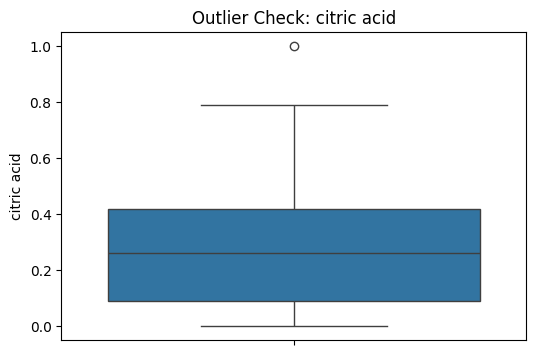

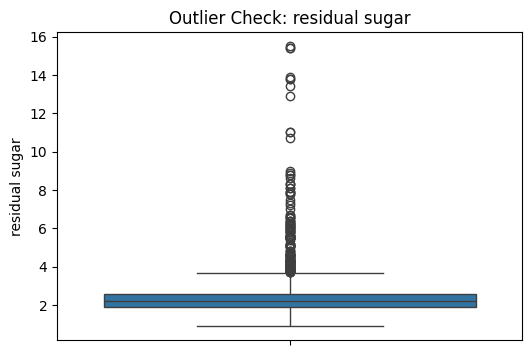

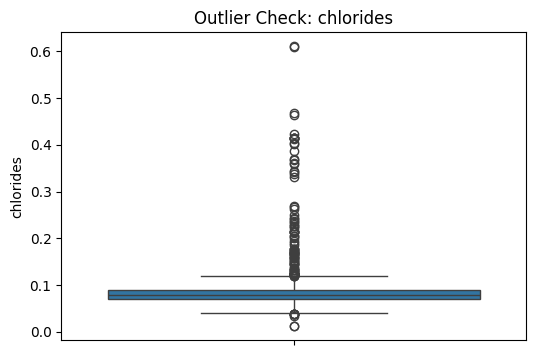

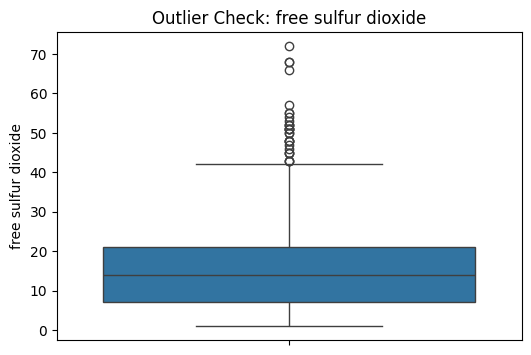

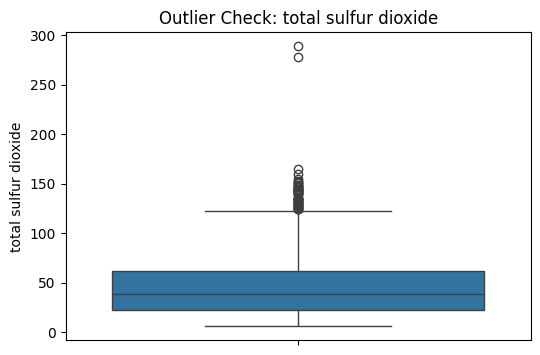

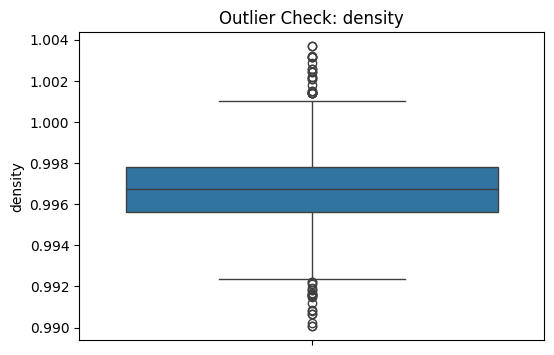

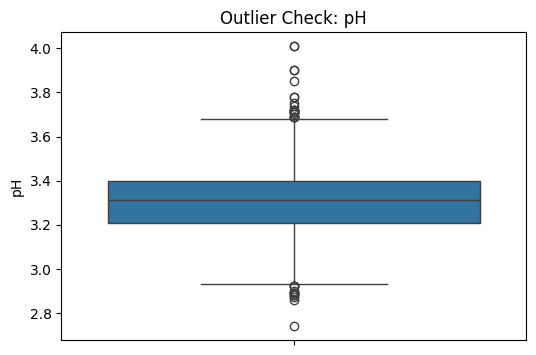

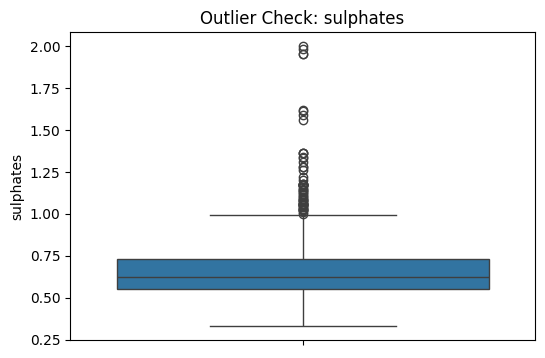

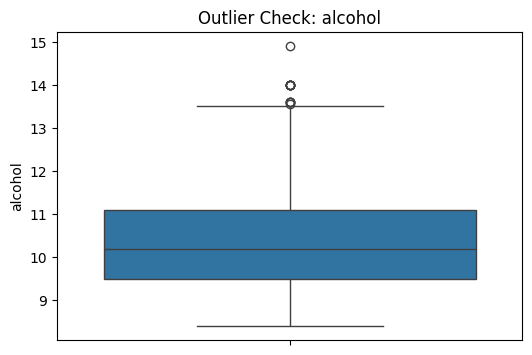

In [22]:
#boxplot to visualise the outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=wine_pro[col])
    plt.title(f'Outlier Check: {col}')
    plt.show()